# ¿Qué es la regresión lineal?
Es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadistica.
En su versión mas sencilla lo que haremos sera "dibujar una recta" que nos indicará la tendencia de un conjunto de datos continuos (si fueran discretos utilizariamos `regresión logística`).

Recordemos rapidamente la fórmula de la recta:
$$y = mX + b$$
- `y`: variable dependiente (lo que queremos predecir)
- `m`: pendiente de la recta (coeficiente que multiplica a x)
- `X`: variable independiente (lo que usamos para predecir)
- `b`: intersección con el eje y (valor de y cuando x es 0)

## ¿Cómo funciona el algoritmo de regresión lineal en Machine Learning?
Los algoritmos de Machine Learning Supervisados aprenden por si mismos y -en este caso- a obtener automáticamente esa "recta" que buscamos con la tendencia de predicción.
- Para hacerlo se mide el error con respecto a los puntos de entrada y el valor `Y` de salida real.
- El algoritmo debe de minimizar el coste de una función de error cuadratico y esos coeficientes corresponderán con la recta óptima.
Hay mucho metodos para conseguir minimizar el coste.
Lo `mas común` es utilizar una versión vectorial y la llamada Ecuación Normal que nos dará un resultado directo.

> Nota: Cuando hablamos de `recta` es en el caso particular de regresión lineal simple. Si hubiera más variables, hay que generalizar el término.

### Un ejercicio practico
Cargaremos un archivo `.csv` obtenido por `webscraping` que contiene diversas URLs a articulos sobre Machine Learning de algunos sitios muy importantes de noticias tecnológicas.
Caracteristicas de entrada -las columnas- tendremos:
- `Title`: Título del artículo
- `url`: Ruta del archivo
- `Word count`: La cantidad de palabras del artículo
- `# of Links`: Los enlaces externos que contiene
- `# of comments`: Cantidad de comentarios
- `# Images video`: Suma de imágenes (o videos)
- `Elapsed days`: La cantidad de días transcurridos (al momento de crear el archivo)
- `# Shares`: Nuestra columna de salida que será la "cantidad de veces que se compartió el artículo"

> Trataremos de predecir cuantas veces será compartido en Redes Sociales

In [15]:
# Regresión lineal simple (con una sola variable)
# Librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Cargamos los datos de entrada
data = pd.read_csv('./data/articulos_ml.csv')
# Observamos cuantas dimensiones tiene
data.shape

(161, 8)

In [5]:
# Vemos las primeras filas
data.head(5)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
# Ahora veremos algunas estadísticas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


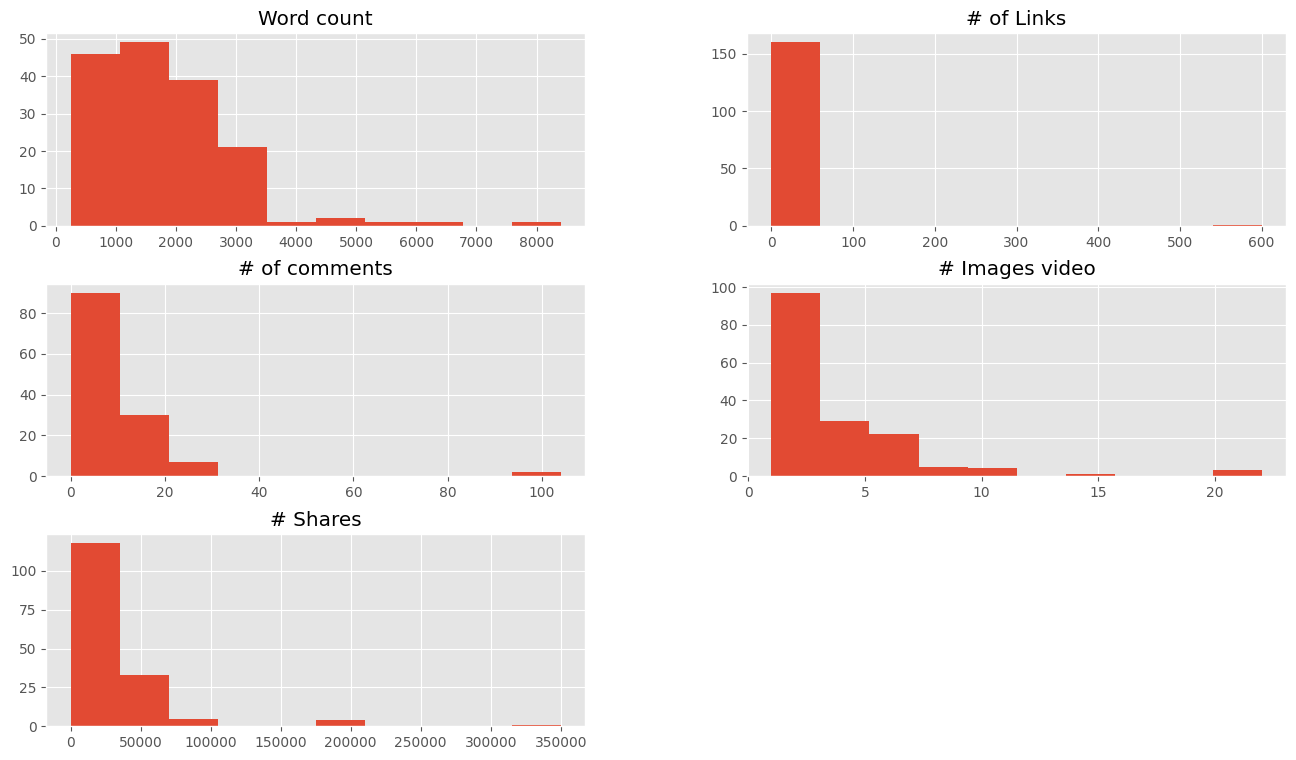

In [16]:
# Visualizamos rápidamente las características de entrada
data.drop(columns=['Title','url','Elapsed days'],axis=1).hist()
plt.show()

En estas gráficas vemos entre qué valores se concentran la mayoría de registros. Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y tambien que con los que tengan Cantidad de compartidos menor a 80000. Los graficaremos pintando en azul los puntos con menos de 1808 (la media) y en naranja los que tengan más.

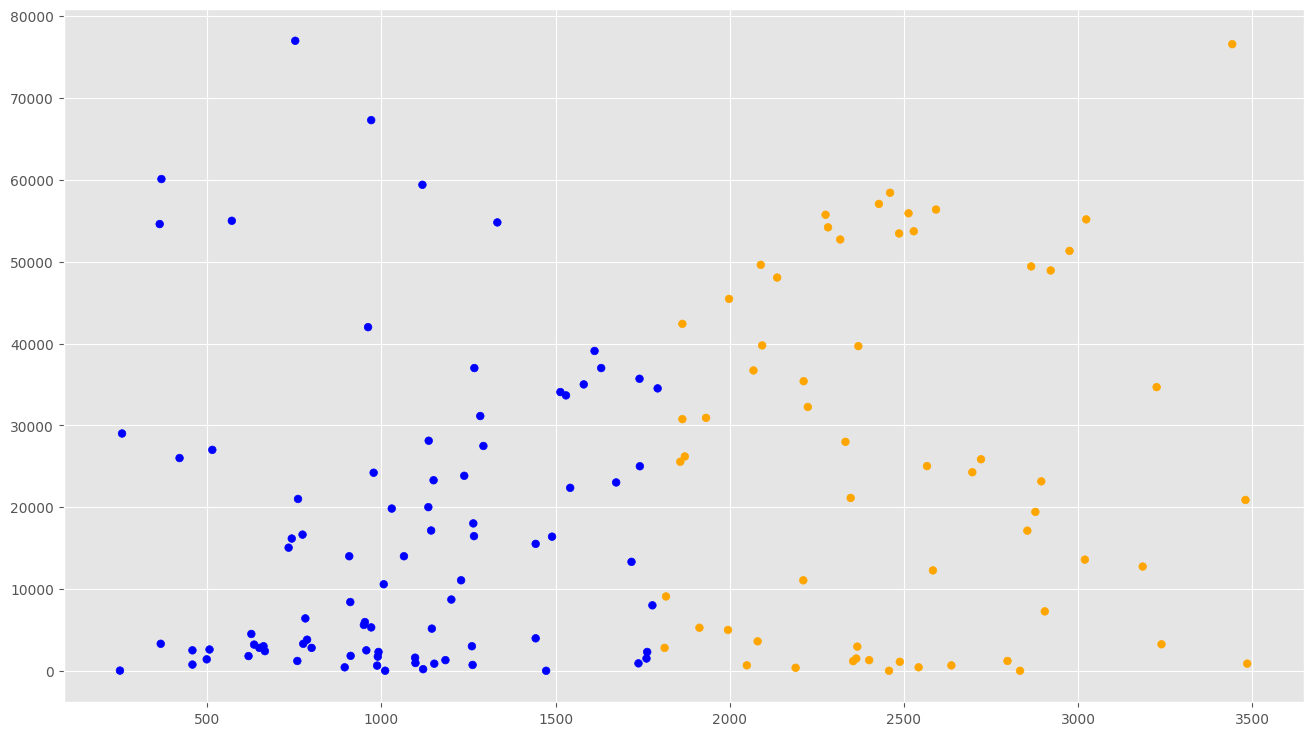

In [17]:
# En el eje X: entre 0 y 3.500
# En el eje Y: entre 0 y 80.000

data_filtered = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores = ['orange','blue']
tamanios = [30,60]

f1 = data_filtered['Word count'].values
f2 = data_filtered['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras.
asignar = [colores[0] if row['Word count'] > 1808  else colores[1] for index, row in data_filtered.iterrows()]
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

# Regresión lineal con Python y SKLearn
Vamos a utilizar la librería `SKLearn` para hacer la regresión lineal.
Crearemos el objeto LinearRegression y lo hacemos `encajar` (entrenar) con el metodo `fit()`.
Finalmente imprimimos los coeficientes `m` y `b` de la recta.

In [22]:
#Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y
dataX = data_filtered[['Word count']]
x_train = np.array(dataX)
y_train = data_filtered['# Shares'].values

# Creamos el objeto de regresión lineal

regr = linear_model.LinearRegression()

# Entrenamos el modelo
regr.fit(x_train, y_train)

# Hacemos las predicciones que en definitiva una linea (2D)
y_pred = regr.predict(x_train)

# Veamos los coeficientes obtenidos, seran la Tangente
print('Coeficiente (m): ', regr.coef_)
# Este es el valor domde corta el eje Y
print('Intersección (b): ', regr.intercept_)
# Error cuadrático medio
print('Error cuadrático medio: %.2f' % mean_squared_error(y_train, y_pred))
# Puntaje de varianza: 1 es perfecto
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente (m):  [5.69765366]
Intersección (b):  11200.30322307416
Error cuadrático medio: 372888728.34
Varianza: 0.06


De la ecuación de la recta $y = mX + b$ nuestra pendiente m es 5.697 y el temino independiente b es 112000. Tenemos un Error Cuadratico medio enorme.. por lo que en realidad este modelo no sera muy bueno prediciendo.

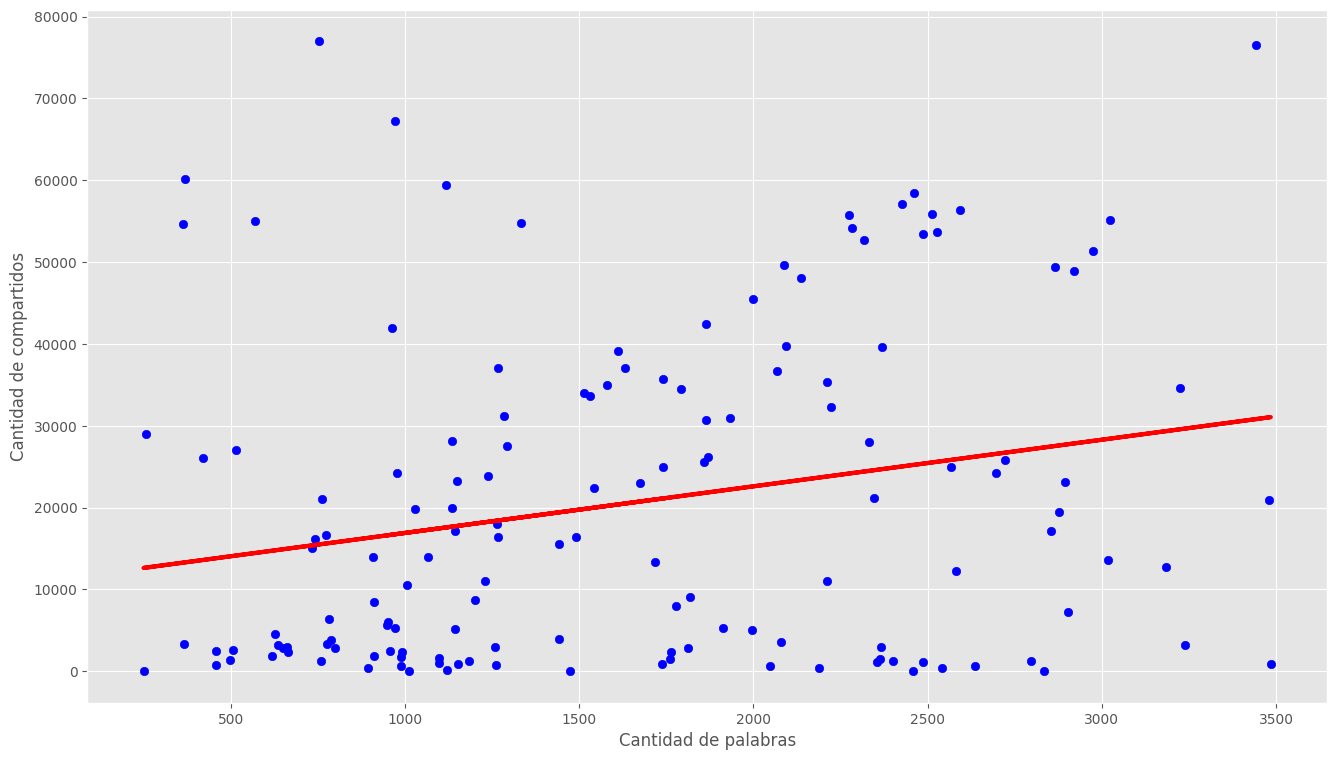

In [23]:
# Visualizamos los datos de entrada y la recta de predicción
plt.scatter(x_train, y_train,  color='blue')
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.xlabel("Cantidad de palabras")
plt.ylabel("Cantidad de compartidos")
plt.show()

# Predicción en regresión lineal simple
Vamos a intentar probar nuestro algoritmo suponiendo que quisieramos predecir cuántos "compartir" obtendrá un articulo sobre ML de 2000 palabras.

In [32]:
y_Dosmil = regr.predict(np.array(2000).reshape(-1, 1))
print("Un artículo de 2000 palabras tendrá una predicción de compartidos de: ", int(y_Dosmil[0]))

Un artículo de 2000 palabras tendrá una predicción de compartidos de:  22595
